<a href="https://colab.research.google.com/github/Batman511/Time-series-analysis-weather-in-Moscow/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D0%B0_%D0%92%D0%94%D0%9D%D0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Загрузка данных

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys(): 
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn,length=len(uploaded[fn])))

Saving Tttr.csv to Tttr.csv
User uploaded file "Tttr.csv" with length 1260390 bytes


In [3]:
df = pd.read_csv("Tttr.csv", sep = ";")
df

,индекс ВМО станции,год,месяц,день,TFlAG,TMIN,QTMIN,TMEAN,QTMEAN,TMAX,QTMAX,R,CR,QR
0,27612,1948,1,1,9,9.0,9,9.0,9,9.0,NaN,NaN,NaN,NaN
1,27612,1948,1,2,9,9.0,9,9.0,9,9.0,NaN,NaN,NaN,NaN
2,27612,1948,1,3,9,9.0,9,9.0,9,9.0,NaN,NaN,NaN,NaN
3,27612,1948,1,4,9,9.0,9,9.0,9,9.0,NaN,NaN,NaN,NaN
4,27612,1948,1,5,9,9.0,9,9.0,9,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,27612,2022,8,27,0,15.2,0,23.0,0,31.3,0.0,0.0,2.0,0.0
27268,27612,2022,8,28,0,17.3,0,23.1,0,30.4,0.0,0.0,2.0,0.0
27269,27612,2022,8,29,0,16.6,0,22.0,0,26.9,0.0,0.0,2.0,0.0
27270,27612,2022,8,30,0,17.8,0,22.5,0,28.5,0.0,0.4,0.0,0.0


TFLAG - групповой признак качества для показателей температуры воздуха \\
TMIN-минимальная температура воздуха за сутки \\
QTMIN- признак качества для TMIN \\
TMEAN - среднесуточная температура воздуха \\
QTMEAN - признак качества для TMEAN \\
TMAX - максимальная температура воздуха за сутки \\
QTMAX - признак качества для TMAX \\
R - суточная сумма осадков \\
CR -  дополнительный признак к  R \\
QR -  признак качества для R \\

Избавимся от лишних колонок и представим дату в нужном формате

In [4]:
data = df[["TMEAN","год","месяц","день"]].copy()
data["date"] = data['год'].astype(str) + '-' + data["месяц"].astype(str) + '-' + data["день"].astype(str)
data.drop(["год", "месяц", "день"], axis = 1, inplace=True)
data.rename(columns={'TMEAN':'Tmean'}, inplace=True)
data = data.set_index("date")
data.index = pd.to_datetime(data.index, format = "%Y-%m-%d")
data

,Tmean
date,
1948-01-01,9.0
1948-01-02,9.0
1948-01-03,9.0
1948-01-04,9.0
1948-01-05,9.0
...,...
2022-08-27,23.0
2022-08-28,23.1
2022-08-29,22.0


# Исследование данных

In [ ]:
print("\nТипы данных колонок:\n",data.dtypes)
print("\nКоличество пропусков данных:\n",data.isna().sum())

Визуализация

In [ ]:
fig=plt.figure(figsize=(15,7))
plt.xlabel("Года",fontsize="12")
plt.ylabel("Средняя температура",fontsize="12")
plt.title('Температура за все время', fontsize = 16)
plt.grid(True)
plt.plot(data)
plt.show()

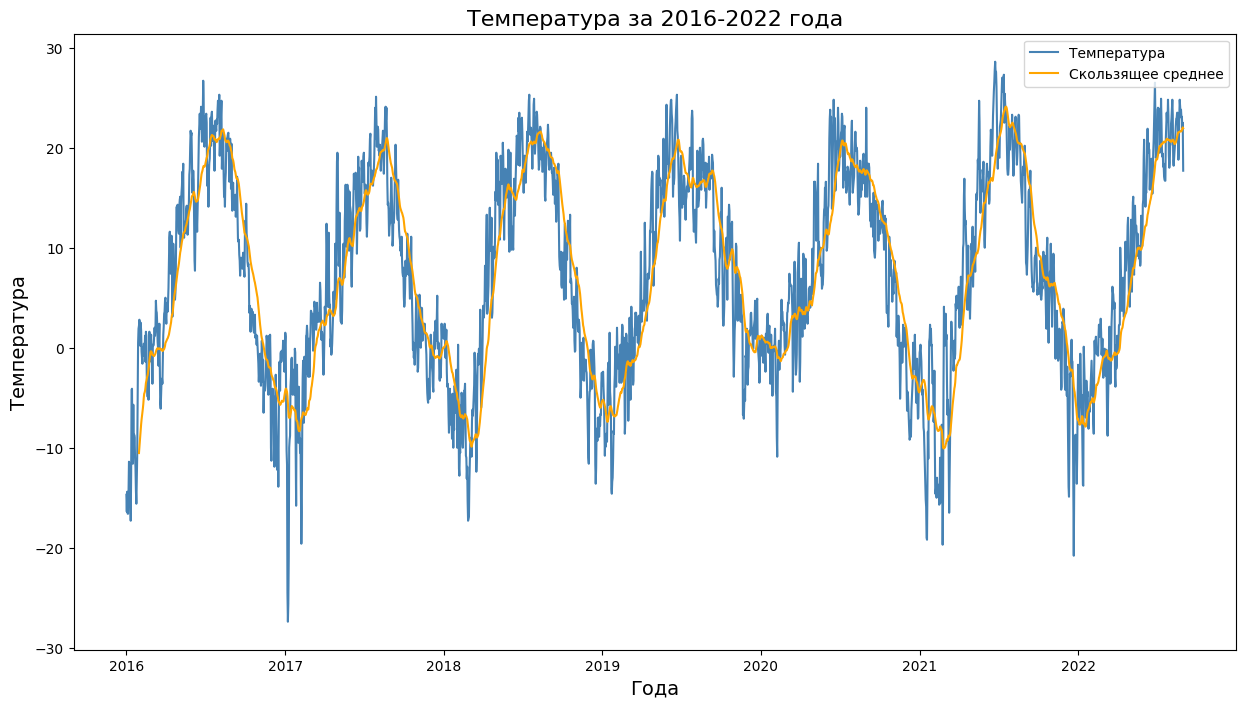

In [26]:
plt.figure(figsize = (15,8))

plt.plot(data.loc["2016-01-01":], label = 'Температура', color = 'steelblue')
plt.plot(data.loc["2016-01-01":].rolling(window = 30).mean(), label = 'Скользящее среднее', color = 'orange')
plt.legend(title = '', loc = 'upper right')
plt.xlabel('Года', fontsize = 14)
plt.ylabel('Средняя температура', fontsize = 14)
plt.title('Температура за 2016-2022 года', fontsize = 16)
plt.show()

## Средние значения

In [8]:
daily_mean=data.groupby(data.index.day).mean()
monthly_mean=data.groupby(data.index.month).mean()
hourly_mean=data.groupby(data.index.hour).mean()
yearly_mean=data.groupby(data.index.year).mean()  # или так    data.resample(rule = 'AS').mean()

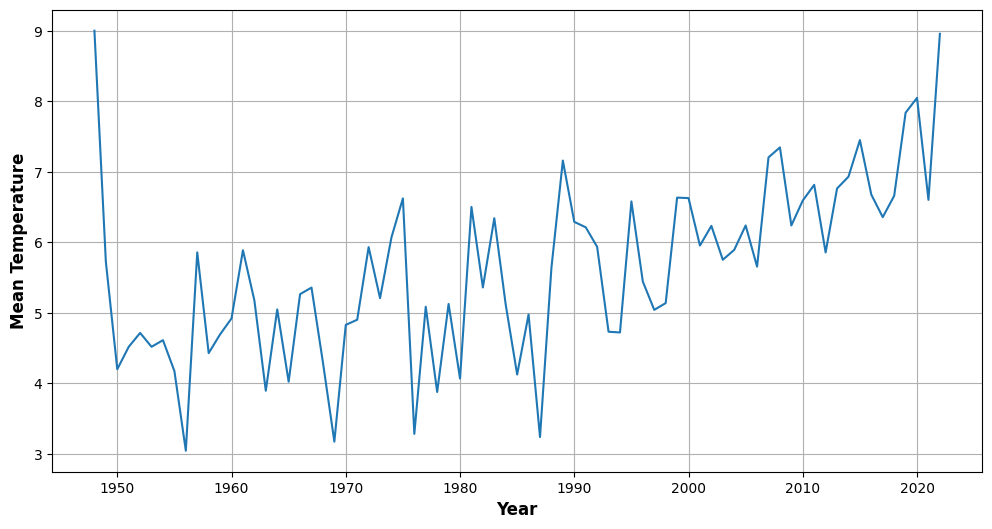

In [16]:
fig=plt.figure(figsize=(12,6))
plt.xlabel("Year",fontsize="12",fontweight="bold")
plt.ylabel("Mean Temperature",fontsize="12",fontweight="bold")
plt.grid(True)
plt.plot(yearly_mean)
plt.show()

## Разложение временного ряда на компоненты

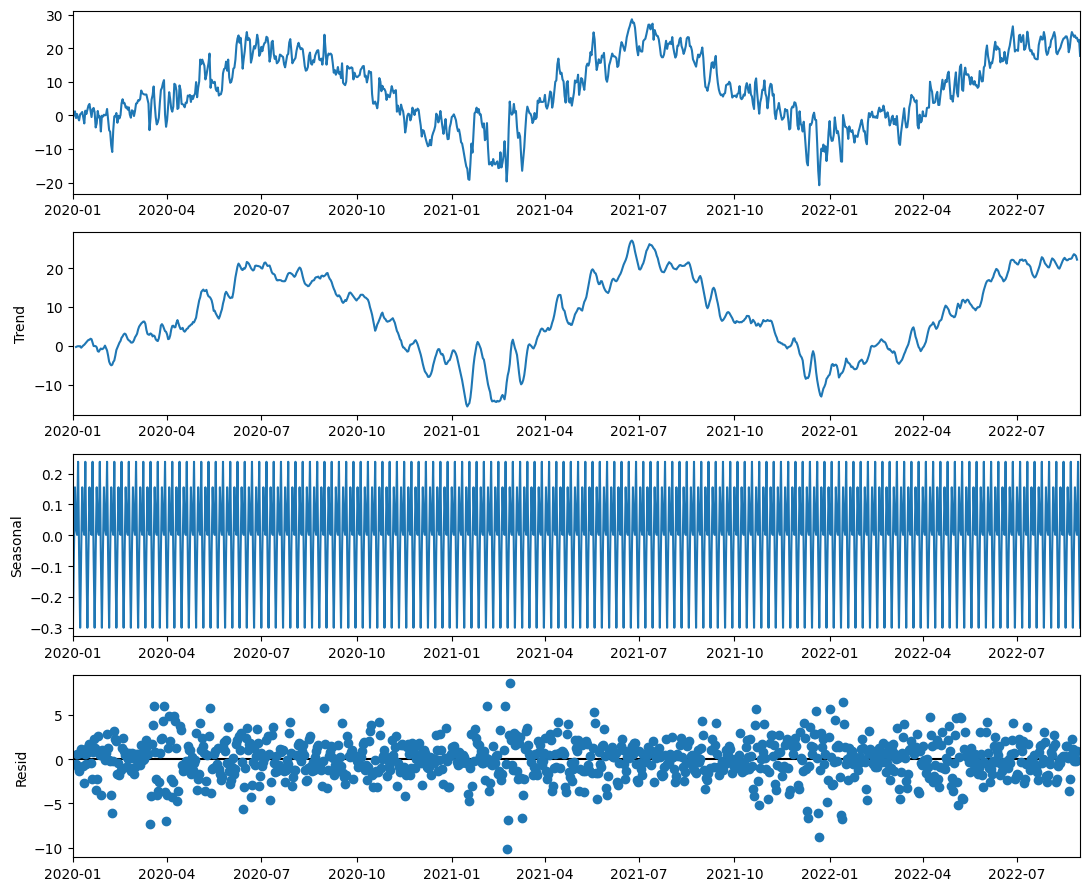

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(data.loc["2020-01-01":])
decompose.plot()
plt.show()

# Деление выборки на тренировочную и тестовую

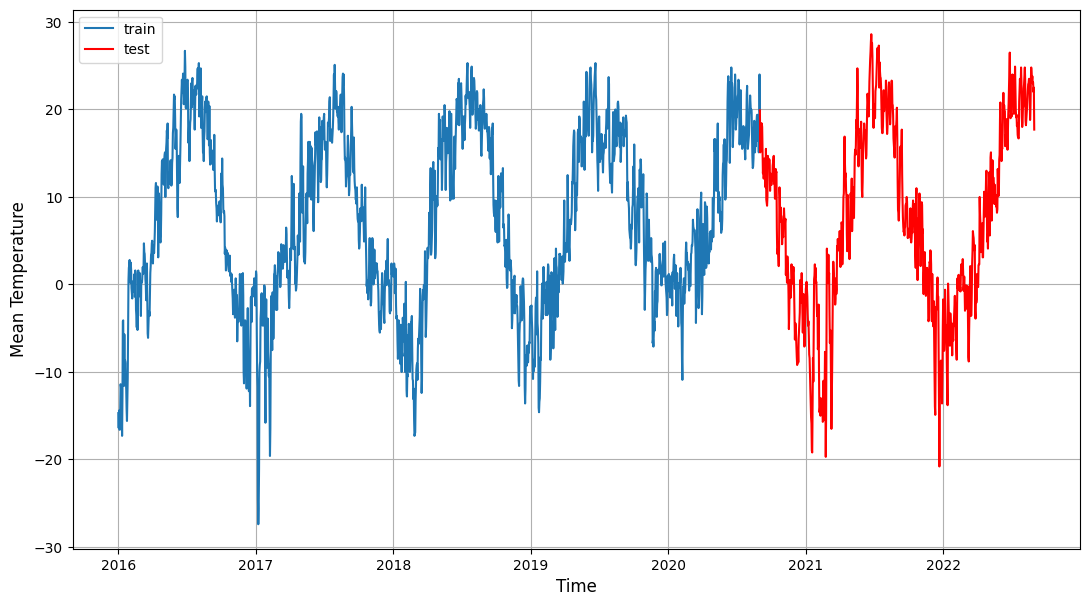

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train = data.loc["2016-01-01":"2020-09-01"]
test = data.loc["2020-09-01":]


fig=plt.figure(figsize=(13,7))
ax = plt.axes()

plt.xlabel("Time",fontsize="12")
plt.ylabel("Mean Temperature",fontsize="12")
plt.grid(True)
plt.plot(train, label="train")
plt.plot(test, label="test", c='red')
plt.legend()
# plt.xlim([datetime.date(2018, 4, 30), datetime.date(2022, 12, 1)])
plt.show()

# AR

Подготовка

P-value:  0.019336871749776614


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


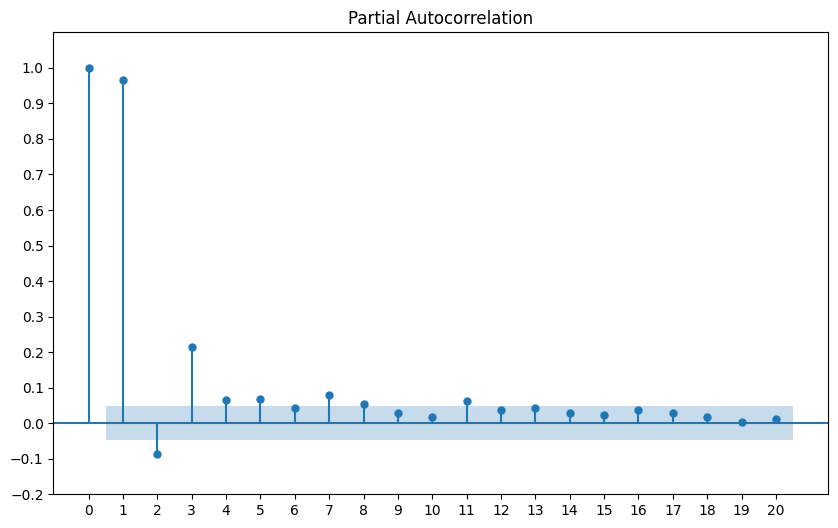

In [43]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

# Проверки стационарности
''' Если значение p-value < 0.05  =>  существует стационарность => можно переходить к автокорреляции '''

stationarityTest = adfuller(train, autolag='AIC')
print("P-value: ", stationarityTest[1])

# График частичной автокорреляции  (анализ прямого влияния)
''' До какого порядка значение корреляции велико, такого порядка и будет AR-модель '''
fig, ax = plt.subplots(figsize=(10,6)) 
plot_pacf(train, lags=20, ax=ax) 
plt.ylim([0,1.1]) 
plt.yticks(np.arange (-0.2, 1.1, 0.1)) 
plt.xticks(np.arange(0, 21, 1))
plt.show()

https://pythonpip.ru/examples/model-arima-v-python  подбор параметров

- Стационарность присутствует

Перебор порядков для модели AR   -   возможно стоит использовать кросс-валидацию

In [82]:
def select_param(train): 
    R2=0
    best_index=0
    for i in range(320,420):
        AR_model_i = AutoReg(train.iloc[:int(len(train)*4/5)], lags=i).fit()
        prediction = AR_model_i.predict(start=int(len(train)*4/5), end=(len(train)-1), dynamic=False)
        r2 = r2_score(train.iloc[int(len(train)*4/5):], prediction)
        if r2>R2:
            R2=r2
            best_index=i
    return R2, best_index       
R2, best_index = select_param(train)    

In [73]:
print("best index with r2={} = ".format(R2), best_index)

best index with r2=0.6280247890832806 =  393


Обучение и тестирование модели за первые 3 месяцев

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)





Mean Absolute Error: 2.704786788504459
Mean Squared Error: 10.830959242574432
R2 score: 0.679797566851214


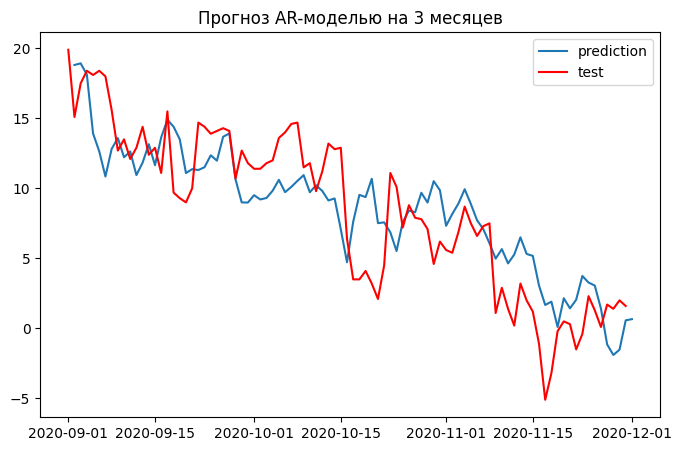

In [80]:
AR_model = AutoReg(train, lags=359).fit()
month = 3
prediction = AR_model.predict(start=len(train), end=(len(train)+30*month), dynamic=False)

fig = plt.subplots(figsize=(8,5))
plt.plot(prediction,label='prediction',)
plt.plot(test[:30*month+1],label='test', color='red')
plt.title('Прогноз AR-моделью на {} месяцев'.format(month))  # , fontdict={'size':12}
plt.legend()
# plt.xlim([datetime.date(2020, 9, 1), datetime.date(2020, 12, 1)])

print('\n\n\nMean Absolute Error:', mean_absolute_error(test[:30*month+1], prediction))
print('Mean Squared Error:', mean_squared_error(test[:30*month+1], prediction))
print('R2 score:', r2_score(test[:30*month+1], prediction))

Прогноз на полном тестовом наборе

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)





Mean Absolute Error: 4.267255576343552
Mean Squared Error: 30.18587019641175
R2 score: 0.7393057684526627


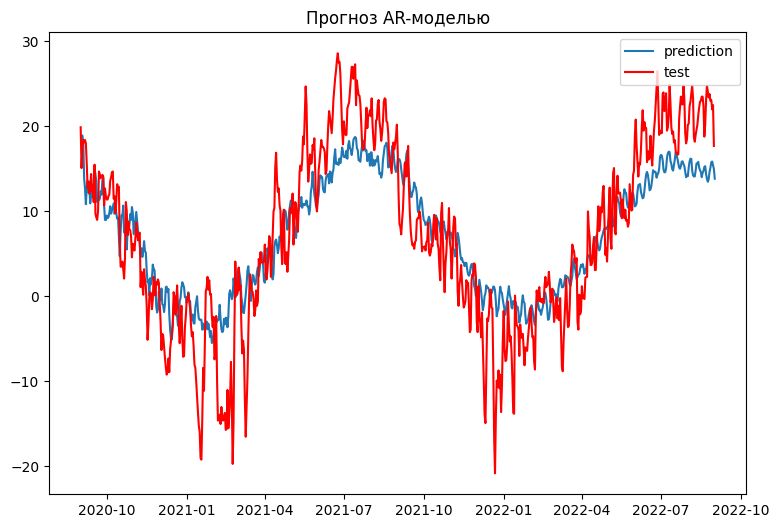

In [77]:
AR_model = AutoReg(train, lags=359).fit()
prediction = AR_model.predict(start=len(train), end=(len(train)+len(test)-1), dynamic=False)

plt.figure(figsize=(9, 6))
plt.plot(prediction,label='prediction',)
plt.plot(test,label='test', color='red')
plt.title('Прогноз AR-моделью')
plt.legend(loc='upper right')


print('\n\n\nMean Absolute Error:', mean_absolute_error(test, prediction))
print('Mean Squared Error:', mean_squared_error(test, prediction))
print('R2 score:', r2_score(test, prediction))

Выводы:
- неплохой результат

# VARMA

скользящая средняя векторной авторегрессии

# SES & MA

<ipython-input-14-9b0a0515b643>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, "g", label="Скользящее среднее", c='orange')


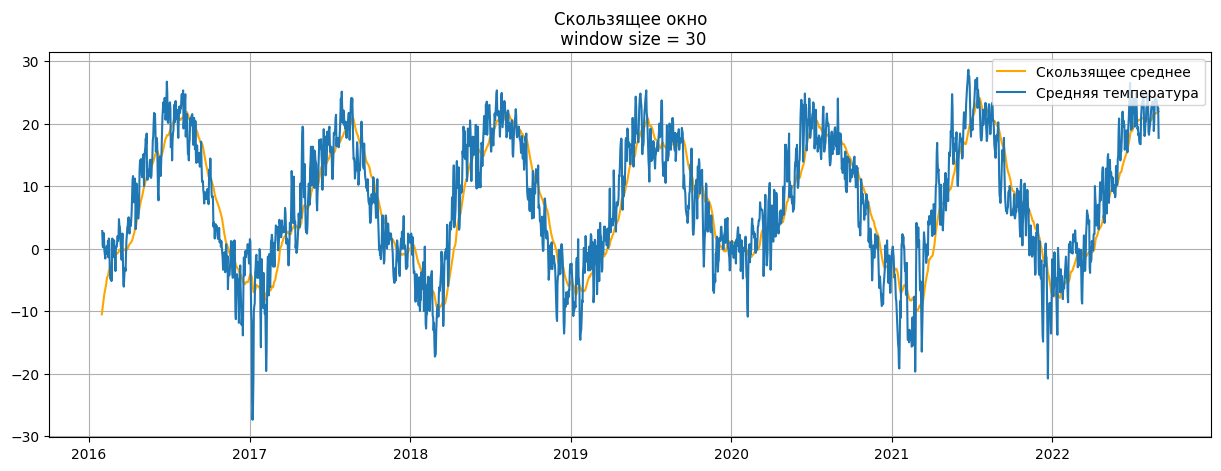

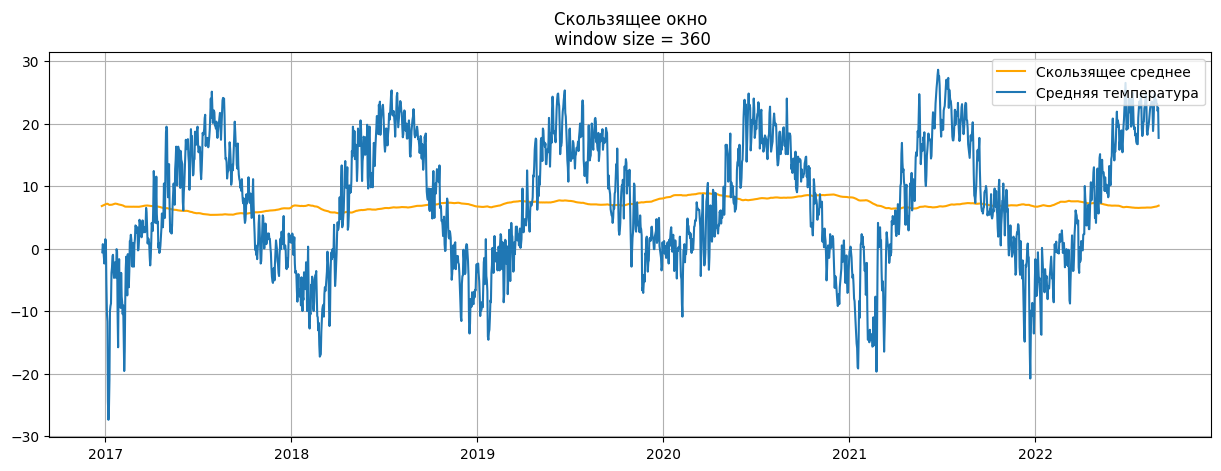

In [14]:
def plotMovingAverage(series, n):
    rolling_mean = series.rolling(window=n).mean()

    plt.figure(figsize=(15,5))
    plt.title("Скользящее окно\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Скользящее среднее", c='orange')
    plt.plot(series[n:], label="Средняя температура")
    plt.legend(loc="upper right")
    plt.grid(True)

plotMovingAverage(data.loc["2016-01-01":], 30) # сглаживание по месяцам
plotMovingAverage(data.loc["2016-01-01":], 360) # сглаживание по годам   

простое экспоненциальное сглаживание может предсказать только на 1 шаг вперед

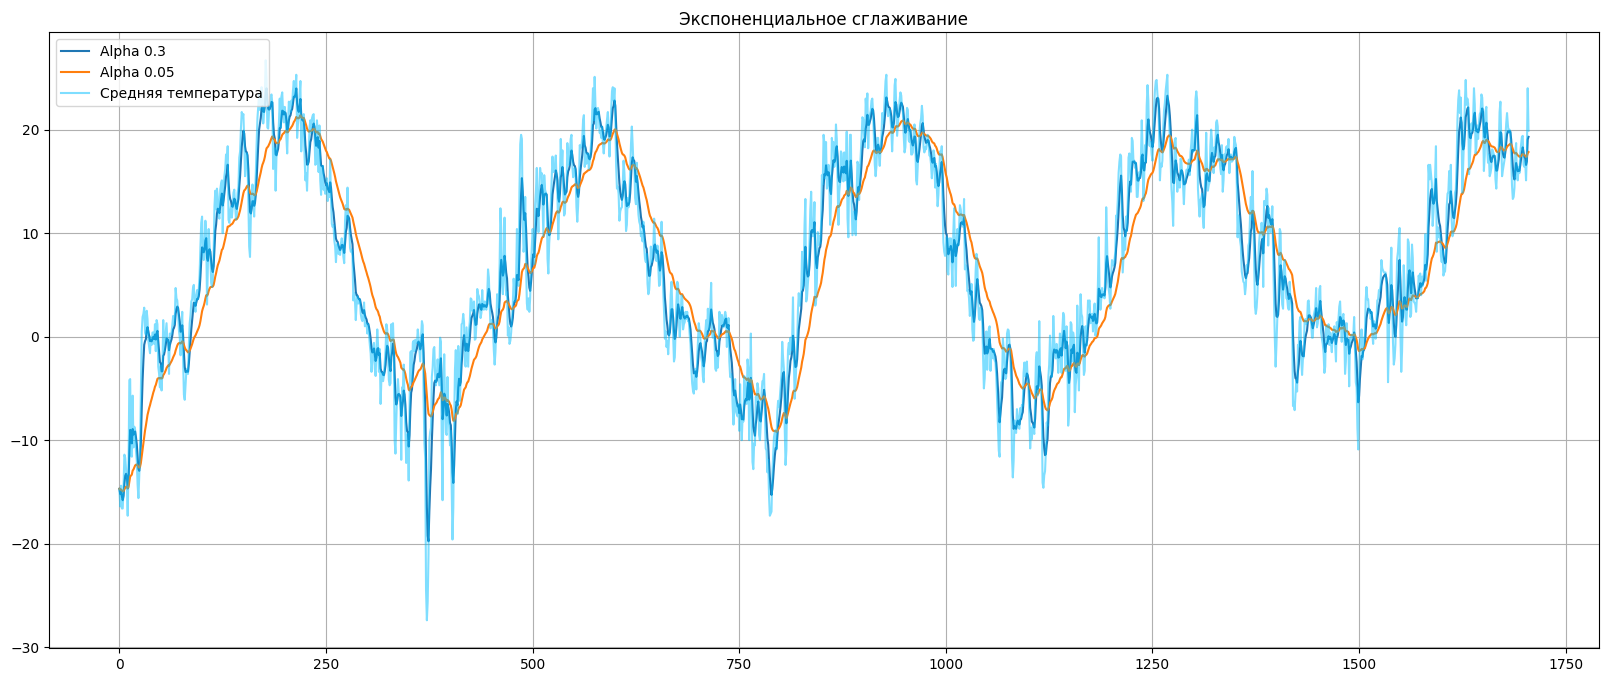

In [16]:
def exponential_smoothing(series, alpha):
    result = [series.iloc[0][0]]
    for n in range(1, len(series)):
        result.append(alpha * series.iloc[n][0] + (1 - alpha) * result[n-1])
    return result


plt.figure(figsize=(20, 8))
for alpha in [0.3, 0.05]:
    plt.plot(exponential_smoothing(train, alpha), label="Alpha {}".format(alpha))

plt.plot(train.values, alpha=0.5, c='deepskyblue', label = "Средняя температура")
plt.legend(loc="upper left")
plt.title("Экспоненциальное сглаживание")
plt.grid(True)    

прогнозное значение для следующего дня

In [18]:
from datetime import timedelta
data_new = pd.DataFrame(data = exponential_smoothing(train, 0.3), index = train.index)

# создадим новый индекс
last_date = data_new.iloc[[-1]].index
last_date = last_date + timedelta(days = 1)
data_new = train.append(pd.DataFrame(index = last_date))

# сдвинем столбец на один день вперед
data_new= data_new.shift(1)
print("Истинное значение: ", test.iloc[0][0])
print("Предсказанное значение: ", data_new.iloc[-1][0])

Истинное значение:  19.9
Предсказанное значение:  19.9


<ipython-input-18-c45451ee06a7>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_new = train.append(pd.DataFrame(index = last_date))


Существует двойное и тройное экспоненциальное сглаживание, заключающееся в добавлении новых переменных, но лучше оставить это для задачи регрессии

# MA + AR

P-value:  7.267505494857776e-05


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


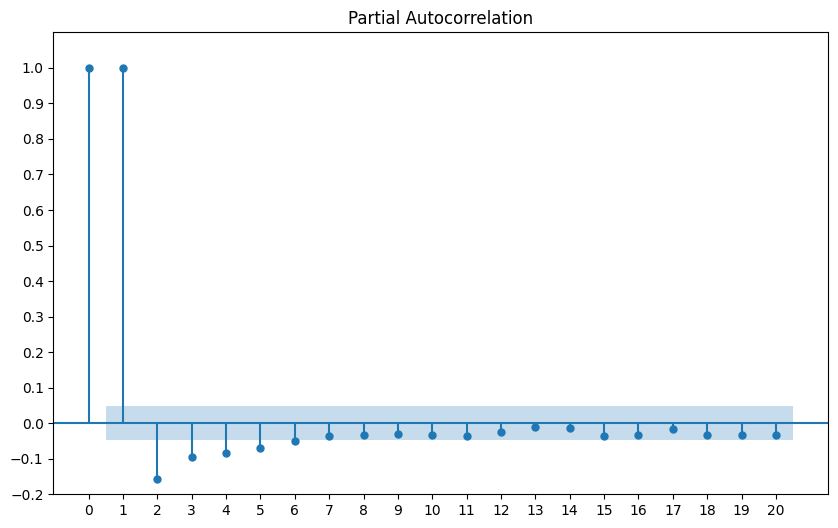

In [36]:
def exponential_smoothing(series, alpha):
    result = [series.iloc[0][0]]
    for n in range(1, len(series)):
        result.append(alpha * series.iloc[n][0] + (1 - alpha) * result[n-1])
    return result

alpha=0.05
exp_train = pd.DataFrame(data=exponential_smoothing(train, alpha), index=train.index)
exp_train.rename(columns={0: "Tmean"},inplace=True)

# Проверки стационарности
stationarityTest = adfuller(exp_train, autolag='AIC')
print("P-value: ", stationarityTest[1])

# График частичной автокорреляции  (анализ прямого влияния)
''' До какого порядка значение корреляции велико, такого порядка и будет AR-модель '''
fig, ax = plt.subplots(figsize=(10,6)) 
plot_pacf(exp_train, lags=20, ax=ax) 
plt.ylim([0,1.1]) 
plt.yticks(np.arange (-0.2, 1.1, 0.1)) 
plt.xticks(np.arange(0, 21, 1))
plt.show()

- Ряд после сглаживания стал более стационарным

Перебор параметров для модели

In [ ]:
R2, best_index = select_param(exp_train)  

In [84]:
print("best index with r2={} = ".format(R2), best_index)

best index with r2=0.7931247346524707 =  361


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)





Mean Absolute Error: 5.295270556876554
Mean Squared Error: 43.71490185284173
R2 score: 0.6224649920130998


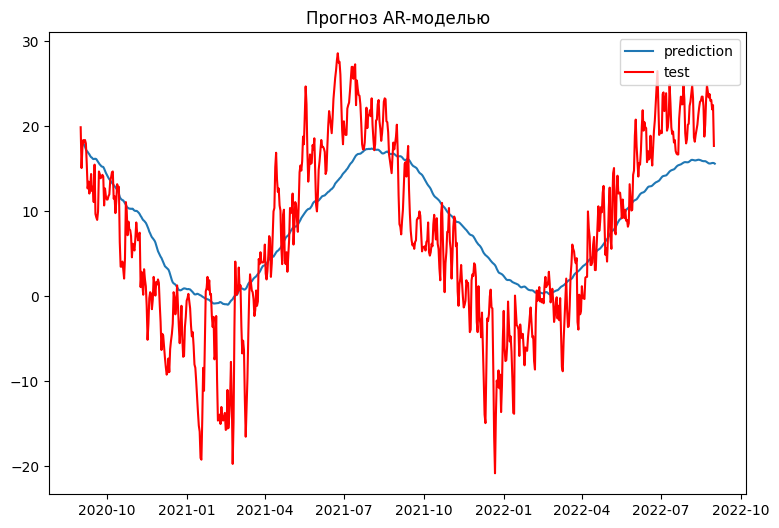

In [85]:
AR_model = AutoReg(exp_train, lags=361).fit()
prediction = AR_model.predict(start=len(train), end=(len(train)+len(test)-1), dynamic=False)

plt.figure(figsize=(9, 6))
plt.plot(prediction,label='prediction',)
plt.plot(test,label='test', color='red')
plt.title('Прогноз AR-моделью')
plt.legend(loc='upper right')


print('\n\n\nMean Absolute Error:', mean_absolute_error(test, prediction))
print('Mean Squared Error:', mean_squared_error(test, prediction))
print('R2 score:', r2_score(test, prediction))

- Сглаживание в данном случае ухудшает результат, можно можно поиграться с параметров alpha

# ARIMA

In [90]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

def ARIMA_model(train,test):
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, typ='levels')
    res=pd.DataFrame({"Pred":yhat, "Act":test.values})
    return res

def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

predict = ARIMA_model(train, test)
show_graph(test, predict, "Модель ARIMA")

NameError: ignored

# SARIMA

Сезонная авторегрессионная интегрированная скользящая средняя. Используется для однофакторного прогнозирования данных временных рядов с трендом и сезонной компонентой.

## Подготовка

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from itertools import product

import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

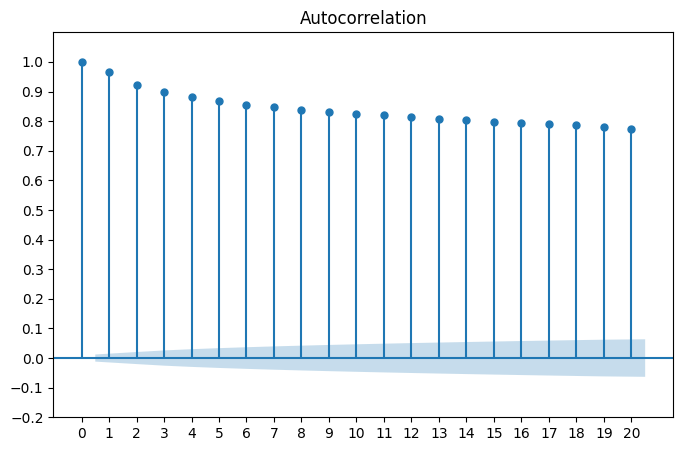

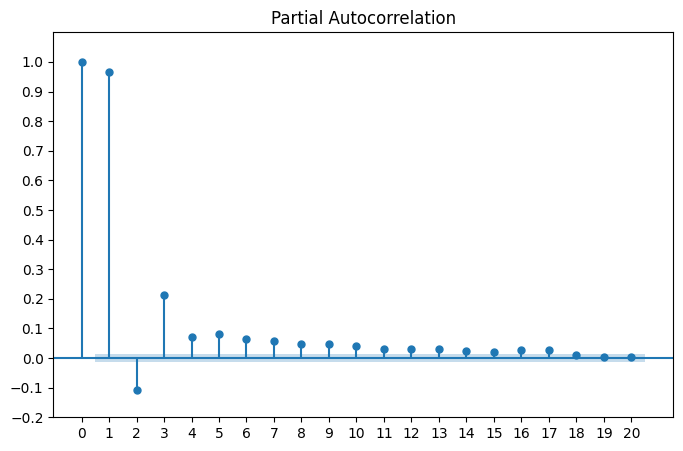

In [8]:
fig, ax = plt.subplots(figsize=(8,5)) 
plot_acf(train, lags=20, ax=ax) 
plt.ylim([0,1.1]) 
plt.yticks(np.arange (-0.2, 1.1, 0.1)) 
plt.xticks(np.arange(0, 21, 1))
plt.show()

fig, ax = plt.subplots(figsize=(8,5)) 
plot_pacf(train, lags=20, ax=ax) 
plt.ylim([0,1.1]) 
plt.yticks(np.arange (-0.2, 1.1, 0.1)) 
plt.xticks(np.arange(0, 21, 1))
plt.show()

Избавляемся от стационарности

In [10]:
# Проверки стационарности
stationarityTest = adfuller(train, autolag='AIC')
p_value = stationarityTest[1]
if p_value <0.05:
  print("Ряд - стационарный")
else:
  print("Требуется дифференцирование")

Ряд - стационарный


In [ ]:
''' В случае нестационарности ряда, провернного с помощью теста Дики-Фуллера, дифференцируем его для получения стационарного '''
# dif_train = np.log(train) 
# dif_train = dif_train.diff() 
# dif_train = dif_train.drop(dif_train.index[0])

# plt.figure(figsize=[12, 7]);
# plt.plot(dif_train) 
# plt.title("Дифференцируемый ряд") 
# plt.show()

- Сезонность погодных данных равна 12 месяцам (это также видно из графика исходных данных)

Избавляемся от сезонности

Критерий Дики-Фуллера: p=0.000000


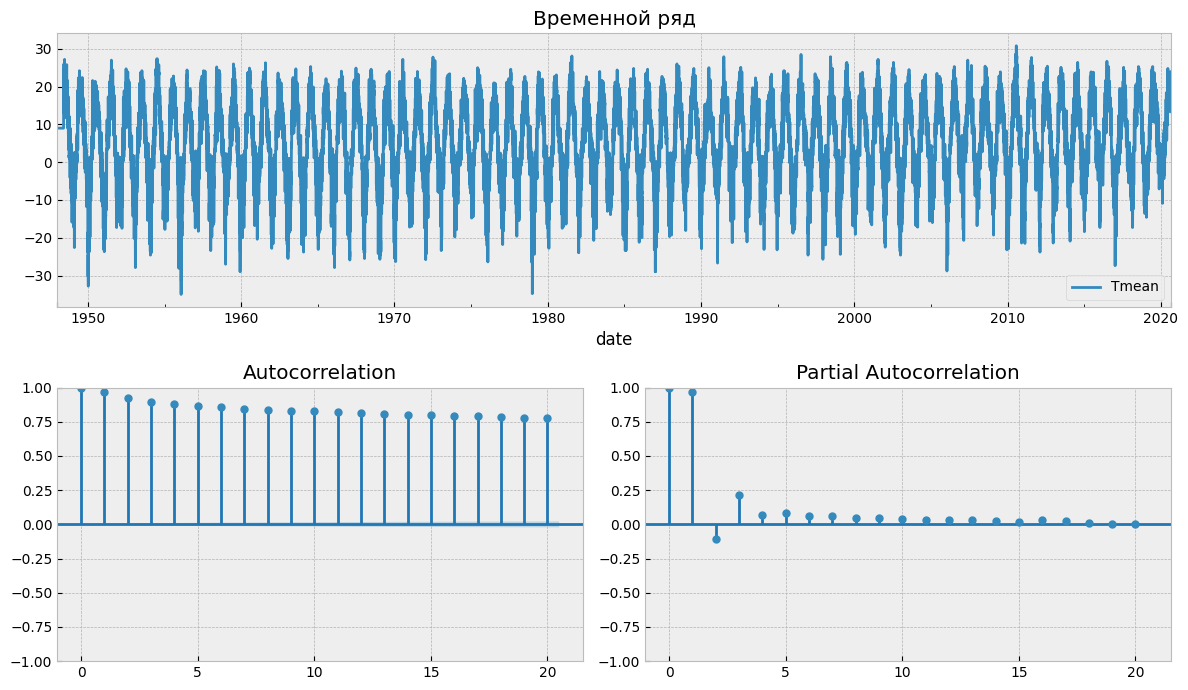

In [7]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Временной ряд')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(train, lags=20)

С помощью сдвига избавимся от сезонности

Критерий Дики-Фуллера: p=0.000000


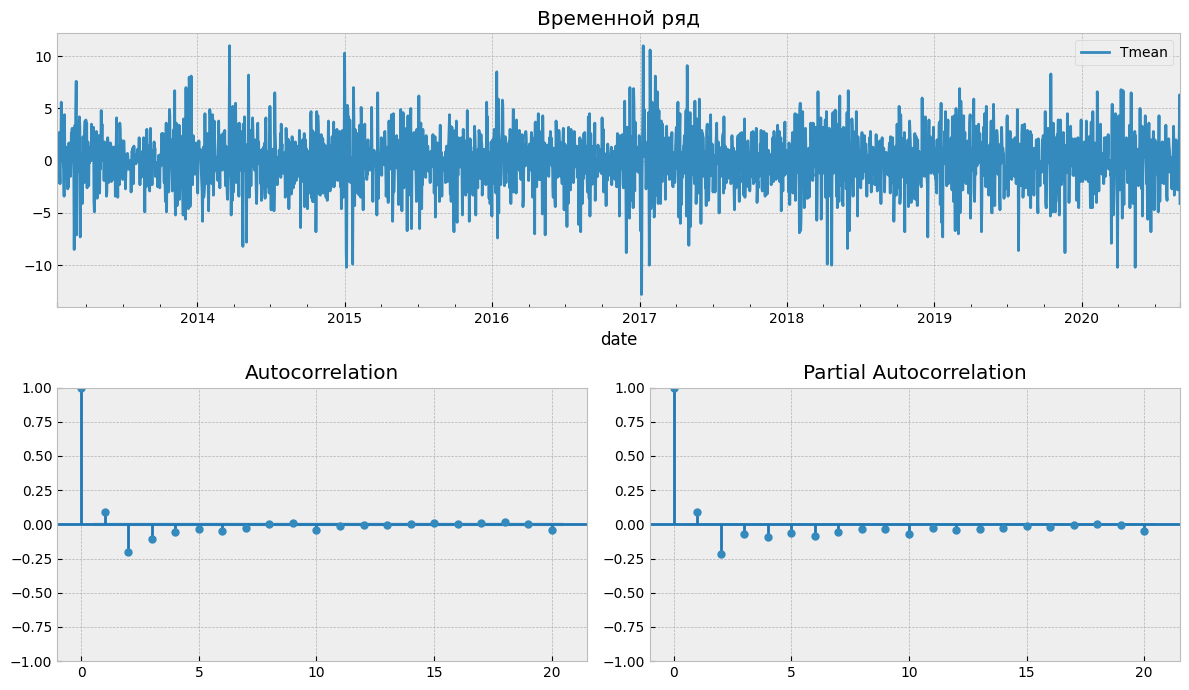

In [8]:
train_shift = train - train.shift(1)
tsplot(train_shift.iloc[30*12*66:], lags=20)

Остатки стационарны, явных автокорреляций нет, построим прогноз по получившейся модели

In [ ]:
# s_train = train.diff(12)
# s_train = s_train.drop([1,2,3,4], axis=0).reset_index(drop=True)

# plt.figure(figsize=[12, 7])
# plt.plot(s_train)
# plt.title("Временной ряд без сезонности")
# plt.show()

## Автоподбор параметров для модели SARIMA

### Первый вариант

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
  
# поиск лучших параметров 
parameter_search = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 360, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)           #
  
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=213.57 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=175072.387, Time=2.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=139414.853, Time=26.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=150872.512, Time=30.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=175070.398, Time=2.44 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=146761.502, Time=6.87 sec


Используем AIC (ценность) как способ сравнения регрессионных моделей. Модель с самым низким AIC лучше всего подходит. Абсолютное значение значения AIC не имеет значения.

### Второй вариант
 - долгий процесс перебора 256 вариантов

https://machinelearningmastery.ru/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/    почитать

https://github.com/HCGrit/MachineLearning-iamJustAStudent/blob/master/Demo-Parallel_Grid_Search_SARIMAX/Demo_Parallel_Grid_Search_SARIMA.ipynb   grid search sarimax

In [ ]:
from tqdm import tqdm_notebook

def optimize_SARIMA(parameters_list, d, D, s, exog):
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df


p = range(0, 4, 1)
d = 2   # порядок интегрирования по ACF
q = range(0, 4, 1)
P = range(0, 4, 1)  # порядок сезонности авторегрессионного процесса
D = 2   # сезонный порядок интегрирования по PACF
Q = range(0, 4, 1)
s = 12  # продолжительность сезона

parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

result_df = optimize_SARIMA(parameters_list, 2, 2, 12, train_shift.loc["2016-01-01":])
result_df

Лучшая модель

In [ ]:
best_model = SARIMAX(train_shift, order=(0, 1, 2), seasonal_order=(0, 1, 2, 365)).fit(dis=-1)
print(best_model.summary())

## Построение модели и прогноз

Найти своб бдз по временным рядам и разобраться

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, 
                order = (3, 0, 0), 
                seasonal_order = (0, 1, 0, 360))

result = model.fit()

Mean Absolute Error: 3213333.3556051883
Mean Squared Error: 10331764209860.447
R2 score: -89228215508.18964


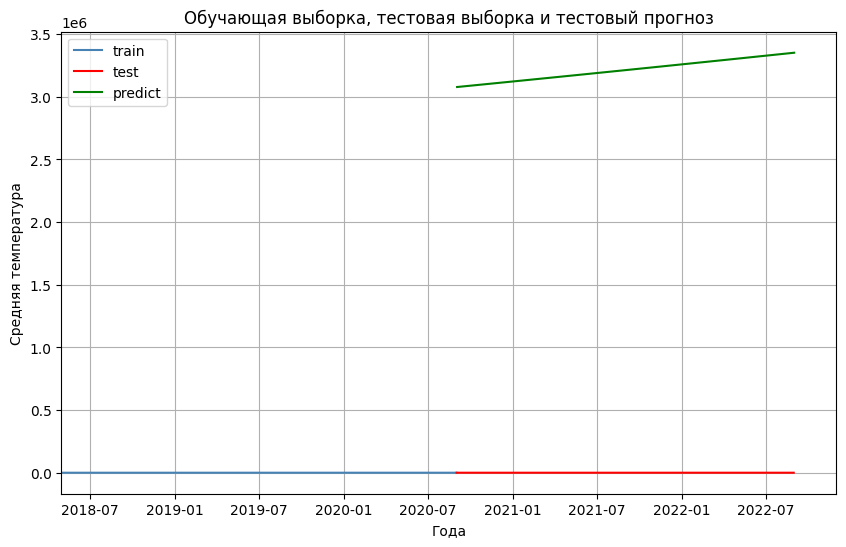

In [10]:
start = len(train)
end = len(train) + len(test) - 1
predictions = best_model.predict(start, end)

fig, ax = plt.subplots(figsize=(10,6)) 
plt.plot(train, label='train',c='steelblue')
plt.plot(test,label='test', color = 'red')
plt.plot(predictions,label='predict', color = 'green')
plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз')
plt.ylabel('Средняя температура')
plt.xlabel('Года')
plt.xlim([datetime.date(2018, 4, 30), datetime.date(2022, 12, 1)])
plt.grid()
plt.legend(title = '', loc = 'upper left')

print('Mean Absolute Error:', mean_absolute_error(test, predictions))
print('Mean Squared Error:', mean_squared_error(test, predictions))
print('R2 score:', r2_score(test, predictions))
plt.show()

# Используем Кросс-валидацию для улучшения обучения модели SARIMA

https://habr.com/ru/companies/ods/articles/327242/

# Prophet

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
# необходимое преобразование исходных данных
prophet_train = pd.DataFrame(data = [train.index, train["Tmean"]], index = ["ds", "y"]).T
prophet_train.dropna(inplace = True)
model = Prophet()
model.fit(prophet_train)

future = model.make_future_dataframe(periods=len(test)) #  создаем dataframe, который содержит все исторические временные точки и еще len(test) дней, для которых мы хотели построить прогноз.
forecast = model.predict(future)
prediction = pd.DataFrame(data = forecast.yhat.values, index=forecast.ds)

Качество модели

Mean Absolute Error: 3.4595040773969594
Mean Squared Error: 21.18504144746143
R2 score: 0.8170396260068409


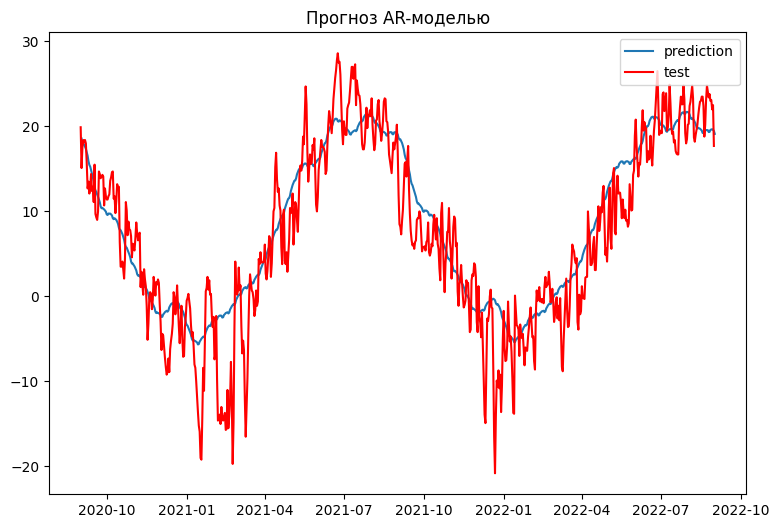

In [137]:
plt.figure(figsize=(9, 6))
plt.plot(prediction[len(train):],label='prediction',)
plt.plot(test,label='test', color='red')
plt.title('Прогноз AR-моделью')
plt.legend(loc='upper right')

print('Mean Absolute Error:', mean_absolute_error(test, prediction[len(train):]))
print('Mean Squared Error:', mean_squared_error(test, prediction[len(train):]))
print('R2 score:', r2_score(test, prediction[len(train):]))

- Пока самая лучшая модель
- ARIMA требует гораздо больших затрат по сравнению с Prophet

## Предсказание после преобразования Бокса-Кокса, нормализующего дисперсию ряда

# Извлечение признаков из временных рядов

## С помощью Prophet

In [ ]:
!pip install chart_studio
!pip install prophet

In [ ]:
from prophet import Prophet
# необходимое преобразование исходных данных
prophet_train = pd.DataFrame(data = [train.index, train["Tmean"]], index = ["ds", "y"]).T
prophet_train.dropna(inplace = True)
model = Prophet()
model.fit(prophet_train)

future = model.make_future_dataframe(periods=0) #  создаем dataframe, который содержит все исторические временные точки
forecast = model.predict(future)

In [143]:
# Новые столбцы
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

## Другими способами

https://habr.com/ru/companies/ods/articles/327242/